In [1]:
import jupyter_black
jupyter_black.load()

# Dimensionality Reduction
This notebook explores the Dimensionality reduction algorithms.
You should fill out the <span style="color:purple">**3 dots ...**</span> with the corresponding lines of codes. <br>

In [2]:
import matplotlib.pyplot as plt

plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

# PCA
## Principal Components

### Using Signgular Value Decomposition (SVD)

The SVD factorization algorithm returns three matrices, $U$, $\Sigma$, and $V$,

such that $X = U Σ V^T$,

where:
- $X$ is an $n × m$ matrix,
- $U$ is an $n × n$ matrix,
- $\Sigma$ is an $n × m$ matrix,
- and $V$ is an $m × m$ matrix; V contains the unit vectors that define the principal components we are looking for.

NB: $X$ needs to be centered.

The reason for centering $X$ before SVD's goal is to identify the variations or patterns in the data without being influenced by the overall scale or mean values.

1. When we subtract the mean of each column from its values, we center the data around zero. This removes the bias introduced by the mean and focuses on the relative variations in the data.
2. Scale Invariance: Centering the matrix makes the SVD more scale-invariant. It ensures that the singular values and vectors capture the relative importance of features rather than being dominated by the absolute magnitude of the values.

But the `svd()` function returns $U$, $s$ and $V^T$ instead.

$s$ is the vector containing all the values on the main diagonal of the top $m$ rows of $Σ$. Since $Σ$ is full of zeros elsewhere, your can easily reconstruct it from $s$, like this:

In [3]:
import numpy as np
from scipy.spatial.transform import Rotation

n = 60
X = np.zeros((n, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(n) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(n, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # shift a bit

In [4]:
# centering the data to remove the bias of scale and improve the quality of our prinicpal component
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
# Extracting the first two principal components (Vt)
c1 = Vt[0]
c2 = Vt[1]

In [5]:
# Constructing Σ from s
n, m = X.shape
Σ = np.zeros_like(X_centered)
Σ[:m, :m] = np.diag(s)

In [6]:
Σ

array([[5.93449971, 0.        , 0.        ],
       [0.        , 2.65661127, 0.        ],
       [0.        , 0.        , 2.04831319],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.

#### Projecting Down to d=2 Dimensions using SVD

In [7]:
# Extracting the first 2 components and
W2 = Vt[:2].T
X2D = X_centered @ W2  # or np.matmul(X_centered,W2)

In [8]:
X2D[:3]

array([[-0.87323119, -0.29459803],
       [ 0.14888518,  0.51493557],
       [ 1.35121872, -0.39950155]])

## Using Scikit-Learn

Let us reduce the dimensionality with PCA.

NB: PCA even takes care of mean centering for us.

In [9]:
from sklearn.decomposition import PCA

# Initialize a PCA with 2 components
pca = PCA(n_components=2)
# Fit the model to X
pca.fit(X)
# Reduce the dimensionality of X using the transform method
X2D = pca.transform(X)

In [10]:
# Print the principal components identified by PCA
pca.components_

array([[ 0.67857588,  0.70073508,  0.22023881],
       [ 0.72817329, -0.6811147 , -0.07646185]])

In [11]:
# Print the explained variance ratio
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

The first dimension explains about 76% of the variance, while the second explains about 15%.

This means that by projecting down to 2D, we lost about 9% of the variance:

In [12]:
# compute the total explained variance
total_explained_variance = pca.explained_variance_ratio_.sum()
# the percentage of lost variance, the loss in variance = 1-sum of kept variance
percentage_of_variance_lost = 100 * (1 - total_explained_variance)
percentage_of_variance_lost

9.028309326742045

## Choosing the Right Number of Dimensions

In [13]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False, parser="auto")
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

# Initialize a PCA (do not specify any hyperparameters)
pca = PCA()
# Fit the model to the train data
pca.fit(X_train)
# Find the number of dimensions (components) needed to keep 95% of the variance
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [14]:
d

154

In [15]:
# Now, re-Initialize a new PCA with n_components=0.95
pca = PCA(n_components=0.95)
# fit the model to the train data
pca.fit(X_train)
# Reduce the dimensionality of X_train using the transform method
X_reduced = pca.transform(X_train)

In [16]:
# Print the number of principal components
pca.n_components_

154

In [17]:
# print the total explained variance
total_explained_variance = pca.explained_variance_ratio_.sum()

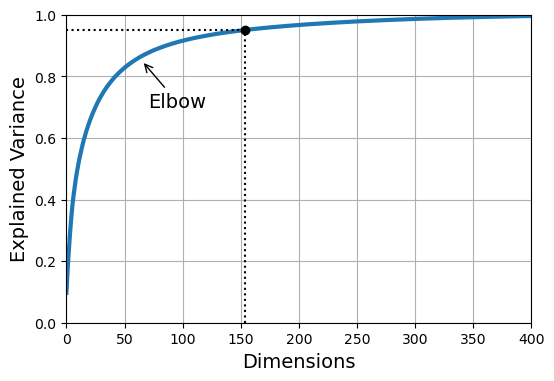

In [18]:
# Plotting the evolution of the explained variance versus the number of principal components
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7), arrowprops=dict(arrowstyle="->"))
plt.grid(True)
plt.show()

As you can see, the smaller the number of components (dimensions), the lower is the explained variance -->

In other terms, the more reduction we do, the more we are loosing information that explain the data.

However, from the figure above, we can identify that for $d>154$, the increase in the explained variance is shallow -->

Compressing the data from 784 to 154 will not make us lose much information.

In the following, we are going to create a pipeline to classify the mnist images. The pipeline consists of reducing the dimensionality of the data, then tarining a classifier on the reduced data.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

# Initialize a pipeline with a PCA and a random forest, (do not specify any hyperparameters here
# but the random state)
clf = make_pipeline(PCA(random_state=42), RandomForestClassifier(random_state=42))
# Fill the list of hyperparams such that:
# 1) set the n_components of PCA to a list of values ranging from 10 to 80
# 2) set the n_estimators of random forest to a list of values ranging from 50 to 500
param_distrib = {
    "pca__n_components": range(10, 80),
    "randomforestclassifier__n_estimators": range(50, 500),
}
# Initialize a random search 3-FOLD cross validation of the pipeline clf and the parameters param_distrib
# with n_iter=10
rnd_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_distrib,
    cv=3,
    random_state=42,
    n_iter=10,
    n_jobs=-1,
    verbose=1,
)
# Fit the rnd_search to the first 1000 samples of the train data
rnd_search.fit(X_train[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'pca__n_components': range(10, 80),
                                        'randomforestclassifier__n_estimators': range(50, 500)},
                   random_state=42, verbose=1)

In [20]:
# Print the best parameters
print(rnd_search.best_params_)

{'randomforestclassifier__n_estimators': 465, 'pca__n_components': 23}


In [21]:
# Extract the best model
best_model = rnd_search.best_estimator_

In [22]:
from sklearn.metrics import accuracy_score

# Predict on the X_test
y_pred = best_model.predict(X_test)
# Compute the test accuracy score
accuracy_score(y_pred, y_test)

0.8539

If we train with 1000 training samples, the best params are: <br>
'randomforestclassifier__n_estimators': 465, 'pca__n_components': 23 <br>
And the test accuracy is 0.8539. <br>

If we train with 3000 training samples, the best params are: <br>
'randomforestclassifier__n_estimators': 475, 'pca__n_components': 57 <br>
And the test accuracy is 0.9049. <br>

In the following, we will try another model the Stochastic Gradient Descent model.


In [23]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

# Initialize a pipeline with a PCA and a SGDClassifier, (do not specify any hyperparameters here but the random state)
clf = make_pipeline(PCA(random_state=42), SGDClassifier(random_state=42))
# Fill the list of hyperparams such that only set the n_components of PCA to a list of values ranging from 10 to 80
param_grid = {"pca__n_components": range(10, 80)}
# Initialize a 3-FOLD grid search with the pipeline clf and the params param_grid
grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1, verbose=1)
# Fit the grid_search to the first 1000 train data samples
grid_search.fit(X_train[:1000], y_train[:1000])

Fitting 3 folds for each of 70 candidates, totalling 210 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=42))]),
             n_jobs=-1, param_grid={'pca__n_components': range(10, 80)},
             verbose=1)

In [24]:
# Print the best parameters
print(grid_search.best_params_)

{'pca__n_components': 79}


In [25]:
# Extract the best model
best_model = grid_search.best_estimator_

In [26]:
from sklearn.metrics import accuracy_score

# Predict on the X_test
y_pred = best_model.predict(X_test)
# Compute the test accuracy score
accuracy_score(y_pred, y_test)

0.5836

SGD clearly performs very bad in comparison with random forest.

## PCA for Compression

In [27]:
import time

# Initialize a PCA with 95% as explained variance
pca = PCA(n_components=0.95)
t0 = time.time()
# Fit the model to X_train and reduce the dimensionality of X_train using the transform method
pca.fit(X_train)
X_reduced = pca.transform(X_train)
print("time needed to fit and transform the train set:", time.time() - t0)

time needed to fit and transform the train set: 4.4122021198272705


In [28]:
# Print the number of principal components
print(pca.n_components_)

154


In [29]:
t0 = time.time()
# Now recover the original data using the inverse_transform method
X_recovered = pca.inverse_transform(X_reduced)
time.time() - t0

0.23250079154968262

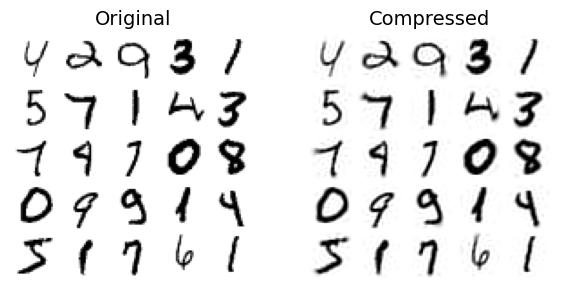

In [30]:
# Let us plot the original digits images and the one reconstructed after being compressed
plt.figure(figsize=(7, 4))
for idx, X in enumerate((X_train[::2100], X_recovered[::2100])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    for row in range(5):
        for col in range(5):
            plt.imshow(
                X[row * 5 + col].reshape(28, 28),
                cmap="binary",
                vmin=0,
                vmax=255,
                extent=(row, row + 1, col, col + 1),
            )
            plt.axis([0, 5, 0, 5])
            plt.axis("off")

As you can see, the compressed images are similar to the original ones with some noise.

Now, repeat this again, but this time, lower the explained variance from 95% to 60% and check the reconstructed images.

You will certainly notice the degeneration of the quality of the reconstructed images.

Compressing data is very important because storage costs money. However, we need to find a compromise between size and reconstruction quality.

## Randomized PCA

time needed to fit and transform the train set: 7.842057943344116
time needed to inverse transform the train set: 0.22873806953430176


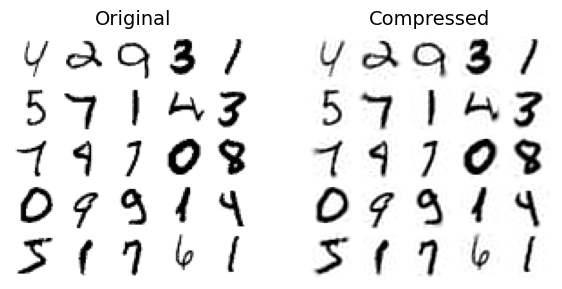

In [31]:
# Initialize a PCA with 95% as explained variance and a randomized solver
# when solver = 'randomized', the PCA only accepts integer values for n_components
# Thus use the n_components identified in the previous step as the one keeping 95% of the explained variance
rnd_pca = PCA(n_components=154, svd_solver="randomized")
t0 = time.time()
# Fit the model to X_train and reduce the dimensionality of X_train using the transform method
rnd_pca.fit(X_train)
X_reduced = rnd_pca.transform(X_train)
print("time needed to fit and transform the train set:", time.time() - t0)

t0 = time.time()
# Now recover the original data using the inverse_transform method
X_recovered = rnd_pca.inverse_transform(X_reduced)
print("time needed to inverse transform the train set:", time.time() - t0)

# Let us plot the original digits images and the one reconstructed after being compressed
plt.figure(figsize=(7, 4))
for idx, X in enumerate((X_train[::2100], X_recovered[::2100])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    for row in range(5):
        for col in range(5):
            plt.imshow(
                X[row * 5 + col].reshape(28, 28),
                cmap="binary",
                vmin=0,
                vmax=255,
                extent=(row, row + 1, col, col + 1),
            )
            plt.axis([0, 5, 0, 5])
            plt.axis("off")

We can clearly see that randomized solver speeds PCA; the training fit and compression time deceased from 24.3 seconds to 13.4 seconds without loss in the quality.

## Incremental PCA

In [32]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
# Initialize an incremental PCA with n_components = n_components identified in the previous step as the one keeping 95% of the explained variance
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    # Fit the model to X_batch
    inc_pca.fit(X_batch)
# Reduce the dimensionality of X_train using the tranform method
X_reduced = inc_pca.transform(X_train)

##### Extra code
Using NumPy's `memmap` class – a memory-map to an array stored in a binary file on disk.


Let's create the `memmap` instance, copy the MNIST training set into it, and call `flush()` which ensures that any data still in cache is saved to disk.

This would typically be done by a first program, not by you.

In [33]:
filename = "my_mnist.mmap"
X_mmap = np.memmap(filename, dtype="float32", mode="write", shape=X_train.shape)
X_mmap[:] = X_train  # could be a loop instead, saving the data chunk by chunk
X_mmap.flush()

Next, another program would load the data and use it for training:

In [34]:
X_mmap = np.memmap(filename, dtype="float32", mode="readonly").reshape(-1, 784)
batch_size = X_mmap.shape[0] // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mmap)

IncrementalPCA(batch_size=600, n_components=154)

# Random Projection
Random projection projection is performed in such a way that the pairwise distances between the data points in the lower-dimensional space are approximately preserved. <br>
With random projection, 2 similar instances will remain similar after the projection abd 2 very different instances will remain different.<br>
The more dimensions we drop, the more information we lose, the more distances get distorted. <br>
The min number of dimensions to preserve in order to ensure, with high probability, that distances won't change by more than a given tolerance $ϵ$.

If you have a dataset of $n$ instances and $m$ features and you do not want the squared distance between any 2 instances to change by more than $ϵ=10%$, then you need to project the data down to $d$ dimensions with $d>= \frac{4log(n)}{1/2 ϵ^2 - 1/3 ϵ^3}$; the equation only relies on the tolerance $ϵ$ and the number of data points $n$ and not on the number of dimensions $d$.

Now that we know $d$, random projection starts by generating a random matrix $P$ of shape [d, n], wher each item is sampled from a Gaussian Distribution with mean 0 and variance = $1/d$. $P$ is used to project the dataset from $m$ dimensions down to $d$.

No training required, the only thing the algorithm does is to create the randon matrix, the algorithm does not use the data itself.


**NB**: this section will use lots of GB of RAM. If your computer runs out of memory, just reduce $n and $m$.

In [35]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim
import numpy as np

n, ε = 5_000, 0.1
# Compute the reduced dimensionality d using the johnson_lindenstrauss lemma
d = johnson_lindenstrauss_min_dim(n, eps=ε)
d

7300

In [36]:
# the equation computed by johnson_lindenstrauss_min_dim
d = int(4 * np.log(n) / (ε**2 / 2 - ε**3 / 3))
d

7300

In [37]:
m = 20_000
np.random.seed(42)
# Random projection starts by generating a random matrix P of shape [d, n], each item of P is sampled from a Gaussian distribution
# of mean 1 and variance = 1/d
P = np.random.randn(d, m) / np.sqrt(d)  # std dev = square root of variance

# generating a fake dataset
X = np.random.randn(n, m)
X_reduced = X @ P.T  # np.matmul(X, P.T)

Now, Scikit-Learn did all this work for us behind the scene, we simply initialize `GaussianRandomProjection`. When we call the `fit` method, Scikit-Learn calls the `johnson_lindenstrauss_min_dim` to determine the output dimensionality $d$, then generates the random gaussian matrix $P$, and stores it in `n_components_` attribute. When the `transform` function is called, the algorithm uses $P$ to perform the projection.

In [38]:
from sklearn.random_projection import GaussianRandomProjection

# Initialize a Gaussian Random Projection model of tolerance = 0.1 (epsilon) and a random state
gaussian_rnd_proj = GaussianRandomProjection(eps=0.1, random_state=42)
# Fit the model to X
gaussian_rnd_proj.fit(X)
# Reduce the dimensionality of X using the transform method
X_reduced = gaussian_rnd_proj.transform(X)  # same result as above

Let us now recover the original dimensionality of X.

For that, we need to:
1. compute the pseudo-inverse of the components matrix using `pinv()` function
2. multiply the reduced dataset by the the transpose of the pseudo-inverse

**Warning**, the following cell may take several minutes to run.

In [39]:
components = gaussian_rnd_proj.components_
# compute the pseudo-inverse of the 'components' matrix using `np.linalg.pinv()` function
components_pinv = np.linalg.pinv(components)
# multiply the reduced dataset by the the transpose of the pseudo-inverse of components
X_recovered = np.dot(X_reduced, components_pinv.T)

Scikit-Learn provides a second random projection transformer, the sparse random projection. It works similarly as Gaussian random projection with the difference in the $P$ matrix, here $P$ is sparse --> the dimensionality reduction quality is the same, it needs much less memry + is much faster (about 50%).

It is recommended to use `SparseRandomProjection` especially for large and sparse datasets.

In [40]:
from sklearn.random_projection import SparseRandomProjection

print("GaussianRandomProjection fit")
# Initialize a GaussianRandomProjection and fit it to the X in one command to time it
%timeit GaussianRandomProjection(random_state=42).fit(X)

print("SparseRandomProjection fit")
# Initialize a SparseRandomProjection and fit it to the X in one command to time it
%timeit SparseRandomProjection(random_state=42).fit(X)

# Now we want to time the transform part
gaussian_rnd_proj = GaussianRandomProjection(random_state=42)
sparse_rnd_proj = SparseRandomProjection(random_state=42)
print("GaussianRandomProjection transform")
# Reduce the dim of X using gaussian_rnd_proj and time it
%timeit gaussian_rnd_proj.fit_transform(X)
print("SparseRandomProjection transform")
# Reduce the dim of X using sparse_rnd_proj and time it
%timeit sparse_rnd_proj.fit_transform(X)

GaussianRandomProjection fit
2.06 s ± 14.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
SparseRandomProjection fit
1.09 s ± 2.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
GaussianRandomProjection transform
11.1 s ± 179 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
SparseRandomProjection transform
2.85 s ± 19.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# LLE

In [41]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding
from matplotlib.colors import ListedColormap

darker_hot = ListedColormap(plt.cm.hot(np.linspace(0, 0.8, 256)))

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
# Initialize a Locally Linear Embedding with 2 components, 10 neighbors and a random state
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42, n_jobs=-1)
# Fit the model to the X_swiss
lle.fit(X_swiss)
# Reduce the dimensionality of X_swiss using the transform method
X_unrolled = lle.transform(X_swiss)

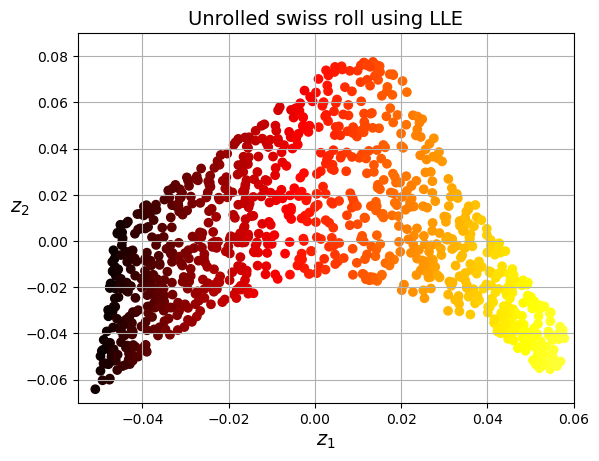

In [42]:
# Plot the new reduced dataset
plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1], c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
plt.axis([-0.055, 0.060, -0.070, 0.090])
plt.grid(True)

plt.title("Unrolled swiss roll using LLE")
plt.show()

Using LLE, the swiss roll is completely unrolled, and the distances are not preserved on a larger scale: the unrolled Swiss roll should be a rectangle, not this kind of stretched & twisted band.

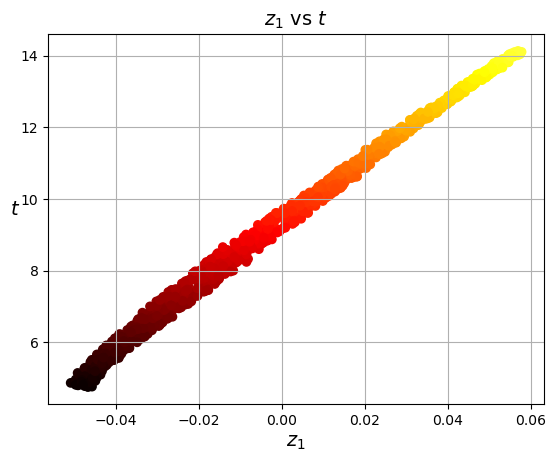

In [43]:
# This plot shows how well correlated z1 is to t: LLE worked fine
plt.title("$z_1$ vs $t$")
plt.scatter(X_unrolled[:, 0], t, c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$t$", rotation=0)
plt.grid(True)
plt.show()

Let us try another manifold dimensionality reduction technique, the Multidimensional scaling (MDS).

MDS reduces the dimensionality while trying to preserve the distances between the instances.


In [44]:
from sklearn.manifold import MDS

# Initialize an MDS of 2 components and a random state
mds = MDS(n_components=2, random_state=42, normalized_stress="auto")
# Fit the model to X_swiss
# mds.fit(X_swiss)
# Reduce the dimensionality of X_swiss using the transform method
X_reduced_mds = mds.fit_transform(X_swiss)

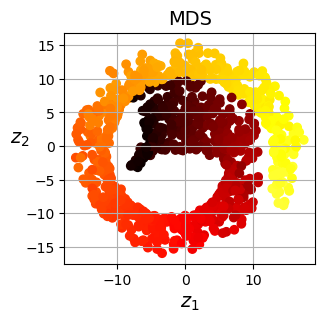

In [45]:
# Plotting the new reduced dataset
plt.figure(figsize=(11, 3))
plt.subplot(131)
plt.title("MDS")
plt.scatter(X_reduced_mds[:, 0], X_reduced_mds[:, 1], c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
plt.grid(True)

plt.show()

MDS manages to flatten the swiss roll without losing its global curvature.

Depending on the downstream task, preserving the large-scale structure may be good or bad.

# Extra Material – Kernel PCA

In [46]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04, random_state=42)
X_reduced = rbf_pca.fit_transform(X_swiss)

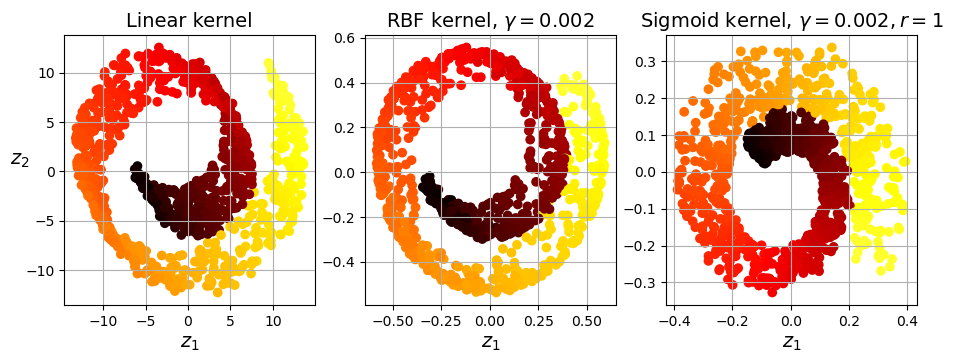

In [47]:
lin_pca = KernelPCA(kernel="linear")
rbf_pca = KernelPCA(kernel="rbf", gamma=0.002)
sig_pca = KernelPCA(kernel="sigmoid", gamma=0.002, coef0=1)

kernel_pcas = (
    (lin_pca, "Linear kernel"),
    (rbf_pca, rf"RBF kernel, $\gamma={rbf_pca.gamma}$"),
    (sig_pca, rf"Sigmoid kernel, $\gamma={sig_pca.gamma}, r={sig_pca.coef0}$"),
)

plt.figure(figsize=(11, 3.5))
for idx, (kpca, title) in enumerate(kernel_pcas):
    kpca.n_components = 2
    kpca.random_state = 42
    X_reduced = kpca.fit_transform(X_swiss)

    plt.subplot(1, 3, idx + 1)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=darker_hot)
    plt.xlabel("$z_1$")
    if idx == 0:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid()

plt.show()

# Dimensionality reduction as a preprocessing step in classification

For this we will use the MNIST dataset (images of $28\times28$) and split it into a training set and a test set.

In [48]:
X_train = mnist.data[:60000]
y_train = mnist.target[:60000]

X_test = mnist.data[60000:]
y_test = mnist.target[60000:]

In [49]:
# Initialize a random forest with 100 trees + a random state
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [50]:
# fit the model to the train data (use %time before the fit command to time it)
%time rnd_clf.fit(X_train, y_train)

CPU times: user 24 s, sys: 89.8 ms, total: 24 s
Wall time: 24.2 s


RandomForestClassifier(random_state=42)

In [51]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = rnd_clf.predict(X_test)
# compute the test accuracy score
accuracy_score(y_test, y_pred)

0.9691

Now let us use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95% and then train a new Random Forest classifier on this reduced dataset and see how long it takes.

In [52]:
from sklearn.decomposition import PCA

# Initialize a PCA with 95% as an explained variance
pca = PCA(n_components=0.95)
# Fit the PCA to the train data
pca.fit(X_train)
# Transform the train data using this fitted pca
X_train_reduced = pca.transform(X_train)

In [53]:
# Initialize a random forest with 100 trees + a random state
rnd_clf_with_pca = RandomForestClassifier(n_estimators=100, random_state=42)
# fit the model to the reduced train data (use %time before the fit command to time it)
%time rnd_clf_with_pca.fit(X_train_reduced, y_train)

CPU times: user 1min 12s, sys: 237 ms, total: 1min 12s
Wall time: 1min 11s


RandomForestClassifier(random_state=42)

Training is about twice slower now!

How can that be?

Well, dimensionality reduction does not always lead to faster training time: it depends on the dataset, the model and the training algorithm.

In terms of computational performance we got worse, let us check the accuracy of the model on the test set.


In [54]:
# reduce the dimensionality of the test set using pca
X_test_reduced = pca.transform(X_test)
# predict using the reduced test set
y_pred = rnd_clf_with_pca.predict(X_test_reduced)
# compute the test accuracy score
accuracy_score(y_test, y_pred)

0.9474

The model accuracy got worse.

However, this is common for the performance to drop slightly when reducing dimensionality, because we do lose some potentially useful signal in the process. However, the performance drop is rather severe in this case.

So PCA really did not help: it slowed down training *and* reduced performance.

Let us try `SGDClassifier` instead of `RandomForestClassifier`.

Exercise: _Try again with an `SGDClassifier`. How much does PCA help now?_

In [55]:
from sklearn.linear_model import SGDClassifier

# Initialize a stochastic gradient descent classifier (set the random state)
sgd_clf = SGDClassifier(random_state=42)
# fit the model to the train data (use %time before the fit command to time it)
%time sgd_clf.fit(X_train, y_train)

CPU times: user 1min 38s, sys: 46.8 ms, total: 1min 38s
Wall time: 1min 39s


SGDClassifier(random_state=42)

In [56]:
# predict on the test set
y_pred = sgd_clf.predict(X_test)
# compute the test accuracy score
accuracy_score(y_test, y_pred)

0.874

The `SGDClassifier` takes much longer to train on this dataset than the `RandomForestClassifier`, plus it performs worse on the test set.

But that's not what we are interested in right now, we want to see how much PCA can help `SGDClassifier`. Let's train it using the reduced dataset:

In [57]:
# Initialize a new SGD model
sgd_clf_with_pca = SGDClassifier(random_state=42)
# fit the model to the reduced train data (use %time before the fit command to time it)
%time sgd_clf_with_pca.fit(X_train_reduced, y_train)

CPU times: user 19.7 s, sys: 221 ms, total: 19.9 s
Wall time: 18.6 s


SGDClassifier(random_state=42)

Nice! Reducing dimensionality led to roughly 5× speedup. :)  Let's check the model's accuracy:

In [58]:
# predict on the reduced test set
y_pred = sgd_clf_with_pca.predict(X_test_reduced)
# compute the test accuracy score
accuracy_score(y_test, y_pred)

0.8959

PCA not only gave us a 5× speed boost, it also improved performance slightly.

**Summary:**

PCA can give you a formidable speedup, and if you're lucky a performance boost... but it's really not guaranteed: it depends on the model and the dataset!

# Homework
## Benchmarking PCA, LLE, and Manifold in MNIST as a dimensionality reduction for vizualization goals

Dimensionality reduction methods are widely used for data exploration and vizualisation.

As humans, we can only see up to 3 dimensions, but are definetly more comfortable with 2.

Thus, we will reduce the MNIST images to 2D; i.e. an image of $28 × 28$ will become one data point of 2 coordinates, and finally, plot the result using Matplotlib.

For this, we will only use the first 5,000 images of the MNIST dataset.

For the plot, we can use a scatterplot using 10 different colors to represent each image's target class.

In [59]:
X_sample, y_sample = X_train[:5000], y_train[:5000]

Let's create a `plot_digits()` function that will draw a scatterplot plus write colored digits, with a minimum distance guaranteed between these digits. If the digit images are provided, they are plotted instead. This implementation was inspired from one of Scikit-Learn's excellent examples ([plot_lle_digits](https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html), based on a different digit dataset).

In [60]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage


def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10.0, 10.0]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(
            X_normalized[y == digit, 0],
            X_normalized[y == digit, 1],
            c=[cmap(float(digit) / 9)],
            alpha=0.5,
        )
    plt.axis("off")
    ax = plt.gca()  # get current axes
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(
                    image_coord[0],
                    image_coord[1],
                    str(int(y[index])),
                    color=cmap(float(y[index]) / 9),
                    fontdict={"weight": "bold", "size": 16},
                )
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(
                    OffsetImage(image, cmap="binary"), image_coord
                )
                ax.add_artist(imagebox)

Let's start with PCA. We will also time how long it takes:

CPU times: user 15.2 s, sys: 933 ms, total: 16.2 s
Wall time: 2.19 s


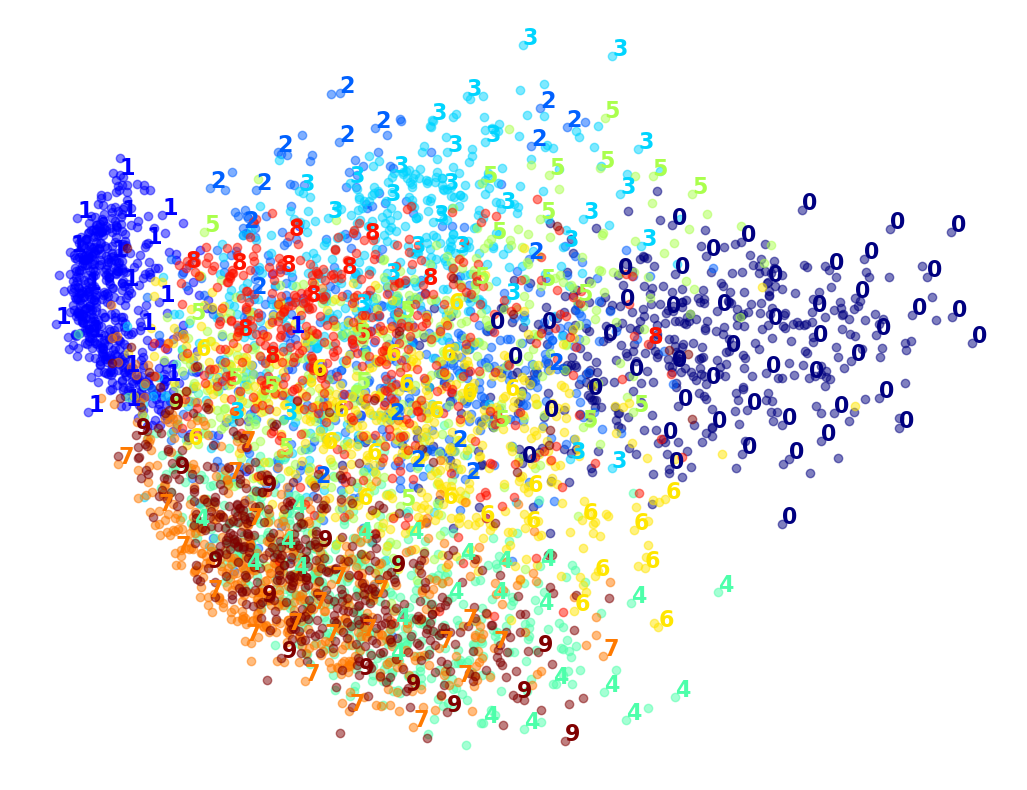

In [61]:
# Initialize a PCA with n_components=2 and a random state
pca = PCA(n_components=2, random_state=42)
# Fit the model and transform the input X_sample with one command 'fit_transform'
%time X_pca_reduced = pca.fit_transform(X_sample)
# Plot the figure
plot_digits(X_pca_reduced, y_sample)
plt.show()

PCA is fast! But although we do see a few clusters, there's way too much overlap.

It is intersting to see that digits like 4 and 9 overlap: that means they are similar somehow, and they are. also, 4,7, and 9, etc.

Let's try LLE:

CPU times: user 14.7 s, sys: 935 ms, total: 15.6 s
Wall time: 2.11 s


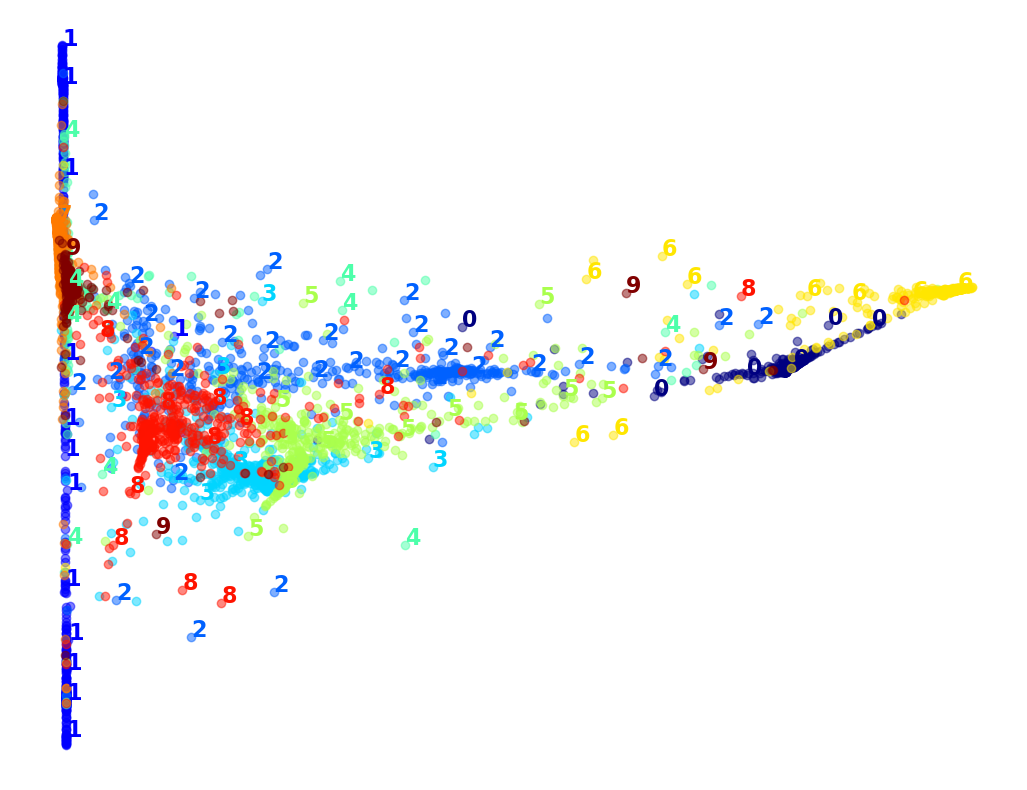

In [62]:
from sklearn.manifold import LocallyLinearEmbedding

# Initialize a Locally linear embedding with 2 components and a random_state
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
# Fit the model and transform the input X_sample with one command 'fit_transform'
%time X_lle_reduced = lle.fit_transform(X_sample)
# Plot the figure
plot_digits(X_lle_reduced, y_sample)
plt.show()

As we can see, LLE took much more time than PCA, and the result does not look good at all.

Let's explore what happens if we apply PCA first, preserving 95% of the variance and then after it apply an LLE.

CPU times: user 17 s, sys: 751 ms, total: 17.7 s
Wall time: 2.37 s


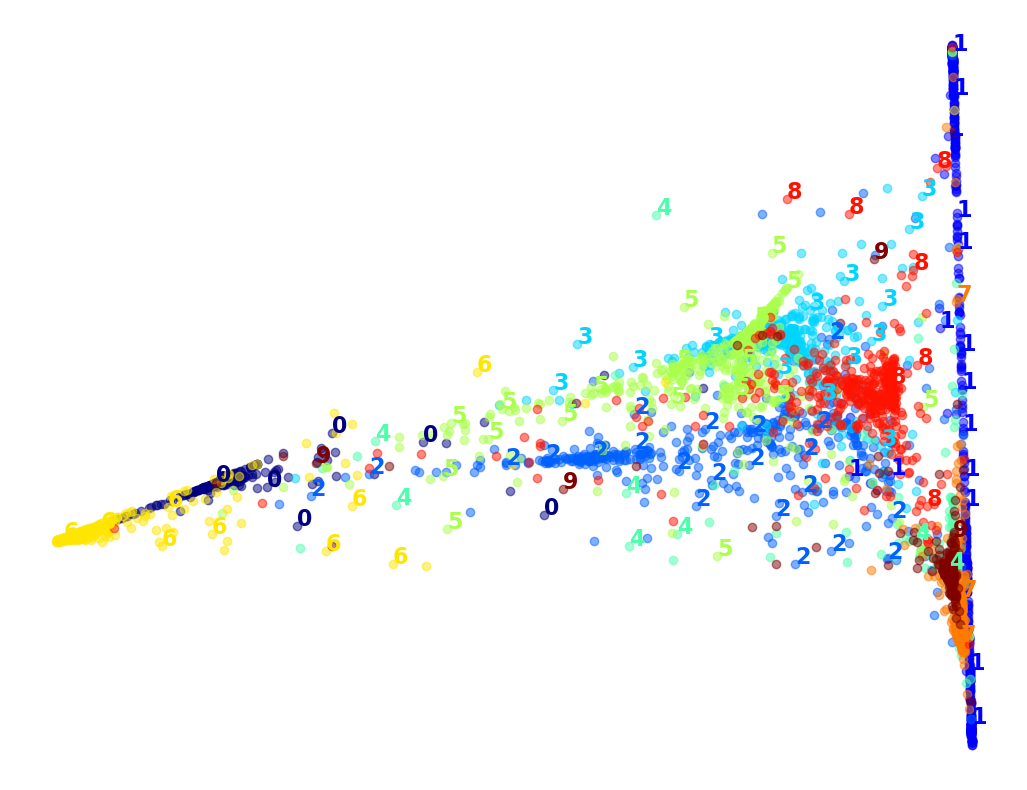

In [63]:
# Initialize a pipeline with:
# 1) a PCA with n_components=95%
# 2) an LLE with 2 components
pca_lle = make_pipeline(
    PCA(n_components=0.95), LocallyLinearEmbedding(n_components=2, n_jobs=-1)
)

# Fit the pipeline and transform the X_sample
%time X_pca_lle_reduced = pca_lle.fit_transform(X_sample)
# Plot the figure
plot_digits(X_pca_lle_reduced, y_sample)
plt.show()

The result is more or less as bad, but this time training was a bit faster (8 seconds instead of 9).

Let's try manifold method called Multidimensional scaling. It reduces the dimensionality while trying to preserve the distances between the instances.

**Warning**, the following cell will take about 10-30 minutes to run, depending on your hardware:

CPU times: user 1.56 s, sys: 397 ms, total: 1.96 s
Wall time: 2min 14s


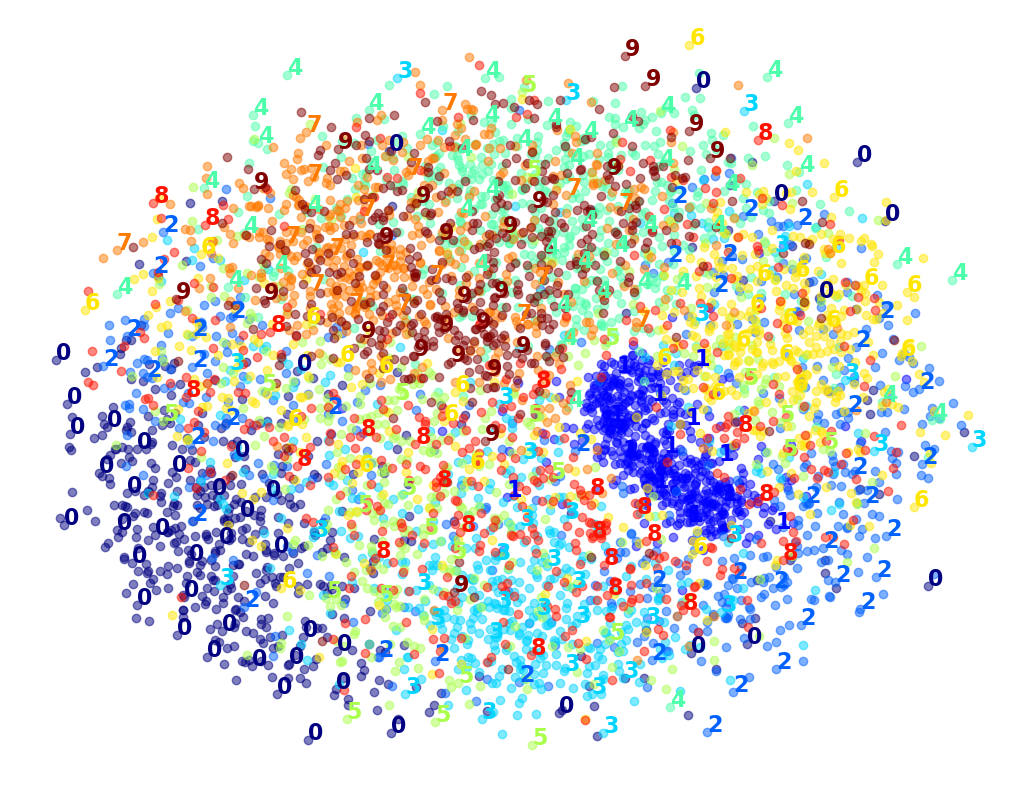

In [64]:
# Initialize an MDS with 2 components and a random state
mds = MDS(
    n_components=2, random_state=42, n_jobs=-1, verbose=1, normalized_stress="auto"
)
# Fit the model and transform the input X_sample with one command 'fit_transform'
%time X_mds_reduced = mds.fit_transform(X_sample)
# Plot the figure
plot_digits(X_mds_reduced, y_sample)
plt.show()

Indeed, this does not look great, all clusters overlap too much.

Let's try with PCA first, perhaps it will be faster and maybe better.

CPU times: user 6.77 s, sys: 562 ms, total: 7.33 s
Wall time: 2min 18s


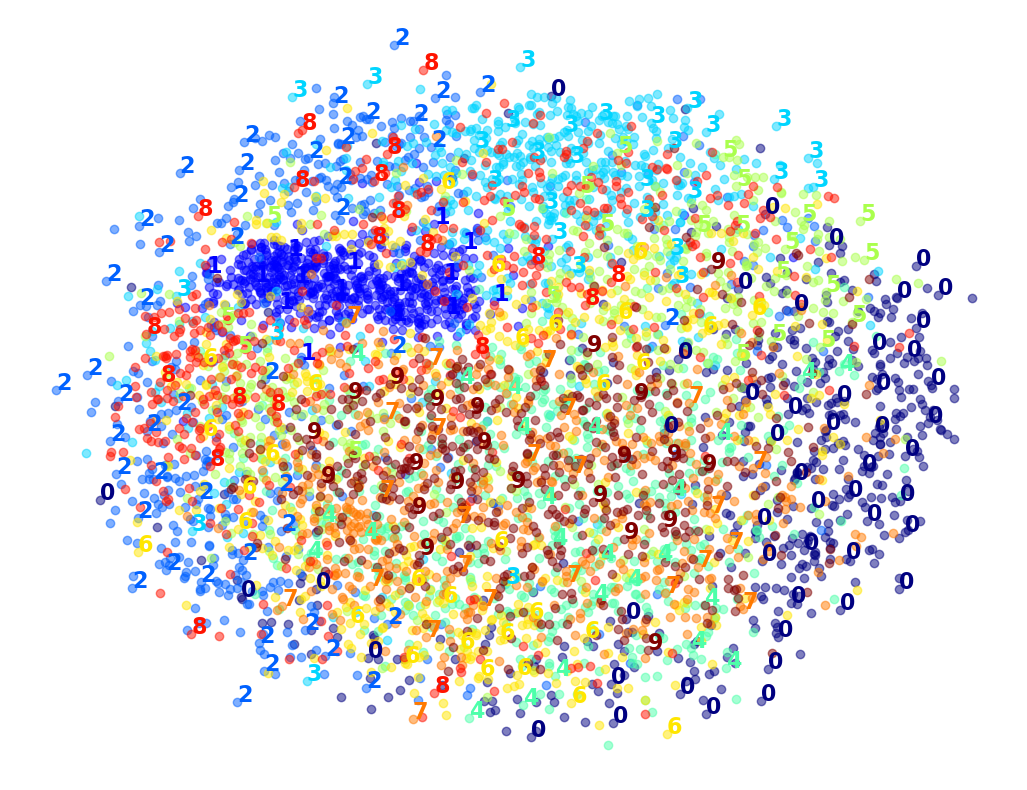

In [65]:
# Initialize a pipeline with:
# 1) a PCA with n_components=95%
# 2) an MDS with 2 components
pca_mds = make_pipeline(
    PCA(n_components=0.95),
    MDS(n_components=2, n_jobs=-1, verbose=1, normalized_stress="auto"),
)
# Fit the pipeline and transform the X_sample
%time X_pca_mds_reduced = pca_mds.fit_transform(X_sample)
# Plot the figure
plot_digits(X_pca_mds_reduced, y_sample)
plt.show()

Same result, and not faster: PCA did not help in this case.